## Laptop Price Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
laptop_df = pd.read_csv('laptop_price - dataset.csv')
laptop_df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00


#### Shape

In [4]:
laptop_df.shape

(1275, 15)

#### Columns

In [5]:
laptop_df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

#### Categorical Columns

In [6]:
cat_cols = laptop_df.select_dtypes(include='object').columns
cat_cols

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company',
       'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys'],
      dtype='object')

#### Numerical Columns

In [7]:
num_cols = laptop_df.select_dtypes(include='number').columns
num_cols

Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
       'Price (Euro)'],
      dtype='object')

#### DataFrame Information

In [8]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

## Data Cleaning

#### Remove Duplicates

In [9]:
laptop_df.duplicated().sum()

0

#### Remove Nulls

In [10]:
laptop_df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

#### Columns Standardization

In [11]:
laptop_df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [12]:
laptop_df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [13]:
laptop_df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [14]:
laptop_df['CPU_Company'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [15]:
laptop_df['CPU_Frequency (GHz)'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [16]:
laptop_df['RAM (GB)'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [17]:
laptop_df['GPU_Company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [18]:
laptop_df['GPU_Company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [19]:
laptop_df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [20]:
laptop_df['Price (Rupee)'] = laptop_df['Price (Euro)'].apply(lambda x: np.round(x * 88.98, 2))

In [42]:
laptop_df['Features'] = laptop_df[['Product','ScreenResolution','CPU_Type','Memory','GPU_Type']].sum(axis = 1)

#### Drop Unwanted Columns

In [21]:
laptop_df.drop(columns=['Price (Euro)','Weight (kg)'], inplace=True)

In [22]:
laptop_df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Price (Rupee)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,119205.62
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,79987.68
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,51163.50


## EDA

#### Columns : Company, TypeName, Inches, CPU_Company, CPU_Frequency (GHz), RAM (GB), GPU_Company, OpSys

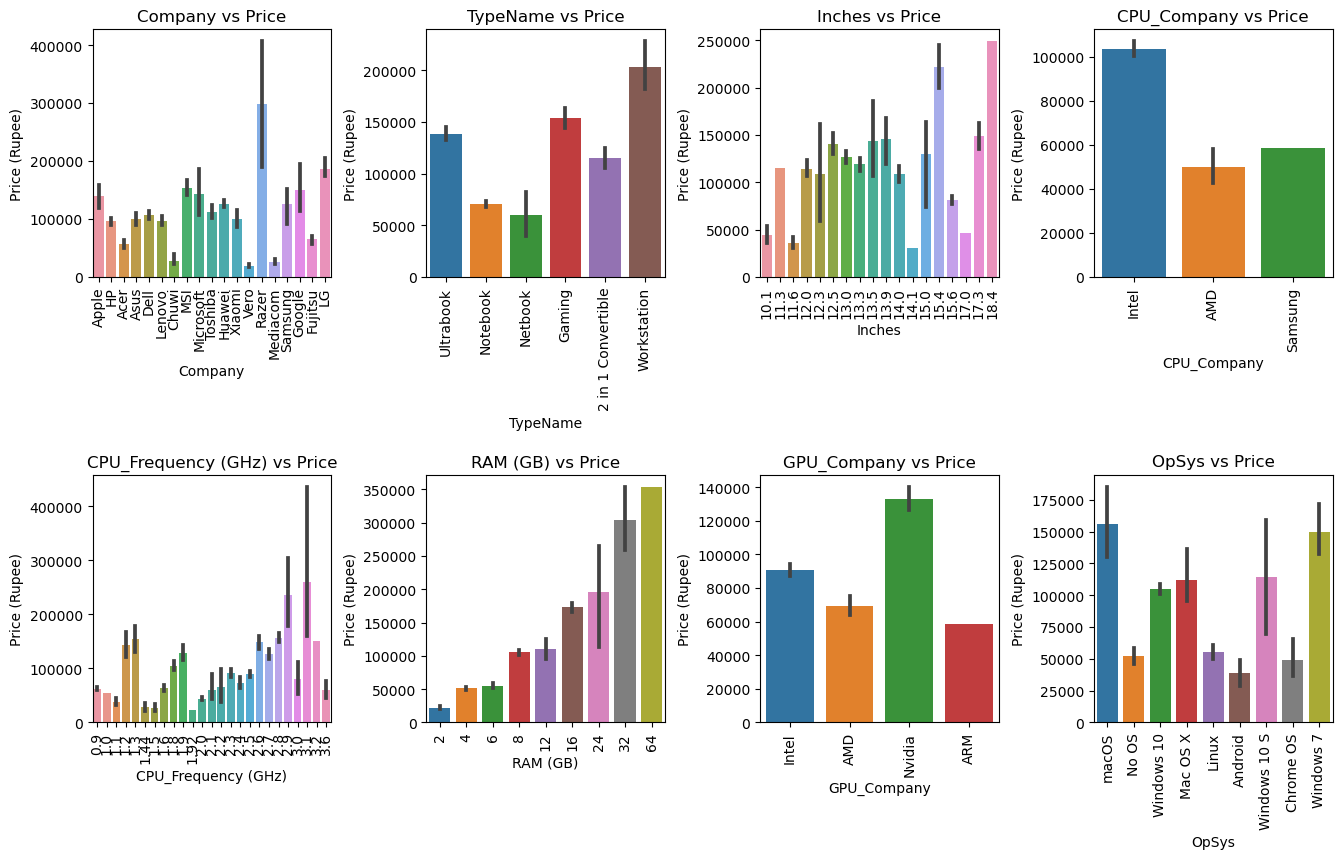

In [23]:
plt.subplots(2, 4, figsize = (16, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.8)

k = 1
for i in ['Company', 'TypeName', 'Inches', 'CPU_Company', 'CPU_Frequency (GHz)', 'RAM (GB)', 'GPU_Company', 'OpSys']:
    plt.subplot(2, 4, k)
    sns.barplot(x = i, y = 'Price (Rupee)', data = laptop_df)
    plt.title(f'{i} vs Price')
    plt.xticks(rotation = 90)
    k += 1

plt.show()

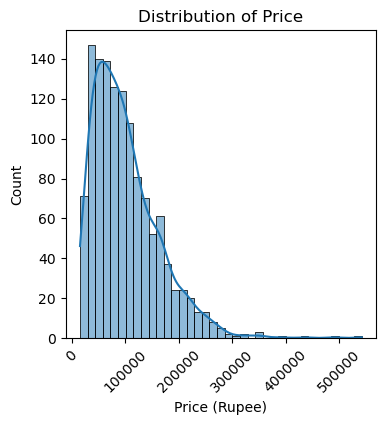

In [24]:
plt.figure(figsize=(4, 4))
sns.histplot(x = 'Price (Rupee)', data = laptop_df, kde = True)
plt.title('Distribution of Price')
plt.xticks(rotation = 45)
plt.show()

## Statistics

#### Quantiles

In [25]:
laptop_df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Price (Rupee)
count,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,100989.546761
std,1.429470,0.503846,5.097809,62352.957818
min,10.100000,0.900000,2.000000,15482.520000
25%,14.000000,2.000000,4.000000,54188.820000
50%,15.600000,2.500000,8.000000,88001.220000
75%,15.600000,2.700000,8.000000,133158.570000
max,18.400000,3.600000,64.000000,542689.020000


#### Correlation

In [26]:
laptop_df.select_dtypes(include='number').corr()

,Inches,CPU_Frequency (GHz),RAM (GB),Price (Rupee)
Inches,1.000000,0.305037,0.241078,0.066608
CPU_Frequency (GHz),0.305037,1.000000,0.366254,0.428847
RAM (GB),0.241078,0.366254,1.000000,0.740287
Price (Rupee),0.066608,0.428847,0.740287,1.000000


## Data Splitting

In [27]:
X = laptop_df.drop(columns='Price (Rupee)')
Y = laptop_df['Price (Rupee)']
X.shape, Y.shape

((1275, 13), (1275,))

## Data Preprocessing

#### Column Transformer

In [29]:
RAMs = np.sort(laptop_df['RAM (GB)'].unique())

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(categories=[RAMs,
                                                                            ['ARM','AMD','Intel','Nvidia'],
                                                                            ['AMD','Samsung','Intel'],
                                                                            ['Netbook','Notebook','2 in 1 Convertible','Ultrabook','Gaming','Workstation'],
                                                                            ['Android','Chrome OS','No OS','Linux','Windows 10','Mac OS X','Windows 10 S','Windows 7','macOS']]), 
                                      ['RAM (GB)', 'GPU_Company', 'CPU_Company', 'TypeName', 'OpSys']),
                                     ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
                                      ['Company', 'Inches', 'CPU_Frequency (GHz)'])], 
                       remainder='drop', sparse_threshold=0)
ct

ColumnTransformer(sparse_threshold=0,
                  transformers=[('encoder',
                                 OrdinalEncoder(categories=[array([ 2,  4,  6,  8, 12, 16, 24, 32, 64], dtype=int64),
                                                            ['ARM', 'AMD',
                                                             'Intel',
                                                             'Nvidia'],
                                                            ['AMD', 'Samsung',
                                                             'Intel'],
                                                            ['Netbook',
                                                             'Notebook',
                                                             '2 in 1 '
                                                             'Convertible',
                                                             'Ultrabook',
                                                             'Gaming',
                                                             'Workstation'],
                                                            ['Android',
                                                             'Chrome OS',
                                                             'No OS', 'Linux',
                                                             'Windows 10',
                                                             'Mac OS X',
                                                             'Windows 10 S',
                                                             'Windows 7',
                                                             'macOS']]),
                                 ['RAM (GB)', 'GPU_Company', 'CPU_Company',
                                  'TypeName', 'OpSys']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Company', 'Inches', 'CPU_Frequency (GHz)'])])

#### TF-IDF

##### Analyzer

In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def Analyzer(text):
    return ' '.join([PorterStemmer().stem(token) for token in word_tokenize(text) if token not in stopwords.words('english')])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=Analyzer)

tfidf

TfidfVectorizer(analyzer=<function Analyzer at 0x000002155A99D6C0>)

In [55]:
X1_preprocessed = pd.DataFrame(tfidf.fit_transform(laptop_df['Features']).toarray())
X1_preprocessed.shape

(1275, 49)

In [57]:
X2_preprocessed = pd.DataFrame(ct.fit_transform(X))
X2_preprocessed.shape

(1275, 64)

##### Concate X1 and X2

In [58]:
X_preprocessed = pd.concat([X1_preprocessed, X2_preprocessed], axis = 1, ignore_index=True)
X_preprocessed.shape

(1275, 113)

## Data Splitting 2

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, Y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((1020, 113), (1020,))

## Model Selection

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'lin_reg': LinearRegression(),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(),
    'random': RandomForestRegressor(),
    'extra': ExtraTreesRegressor(),
    'gbt': GradientBoostingRegressor(),
    'hgbt': HistGradientBoostingRegressor(),
    'svm': SVR()
}

In [61]:
from sklearn.model_selection import cross_val_score

for i in models.keys():
    scores = cross_val_score(models[i], X_preprocessed, Y, cv = 5)
    print(f'{i}: ')
    print(f'{scores} \t {scores.mean()}')
    print('--------------------------------')

lin_reg: 
[-2.42042744e+01  7.85446248e-01  8.03250321e-01  7.37159007e-01
 -2.65570931e+20] 	 -5.311418619396133e+19
--------------------------------
knn: 
[0.71201462 0.75481149 0.69937711 0.72014696 0.78067821] 	 0.7334056783786007
--------------------------------
dt: 
[0.49784623 0.51588053 0.63789875 0.62971188 0.59017332] 	 0.5743021411516843
--------------------------------
random: 
[0.81141781 0.83356913 0.81251405 0.75183491 0.7352386 ] 	 0.7889149006307469
--------------------------------
extra: 
[0.86022706 0.85186849 0.77974435 0.79774057 0.76481636] 	 0.8108793655772907
--------------------------------
gbt: 
[0.85001057 0.81393121 0.81115766 0.78973198 0.75145215] 	 0.8032567145334426
--------------------------------
hgbt: 
[0.80784696 0.84289696 0.81709887 0.75798074 0.76322848] 	 0.7978104035777088
--------------------------------
svm: 
[-0.00022239 -0.03747532 -0.0264079  -0.20786427 -0.0712774 ] 	 -0.06864945648800788
--------------------------------


## Model Building

In [73]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

## Model Evaluation

In [74]:
from sklearn.metrics import mean_squared_error as mse

y_pred = model.predict(X_test)
print(f'r-squared score: {model.score(X_test, y_test)}')
print(f'MSE: {mse(y_test, y_pred)}')

r-squared score: 0.8654961661319266
MSE: 528564640.555202
